In [32]:
from stabletrees import BaseLineTree, NaiveUpdate,AbuTreeI,BABUTree
from sklearn.model_selection import train_test_split, RepeatedKFold
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [2]:
SEED = 0
EPSILON = 1.1
def S2(pred1, pred2):
    return np.mean((pred1- pred2)**2)
models = {  
            "baseline": BaseLineTree(),
            "SL":NaiveUpdate()
            }
standard_stability_all= {name:[] for name in models.keys()}
mse_all= {name:[] for name in models.keys()}


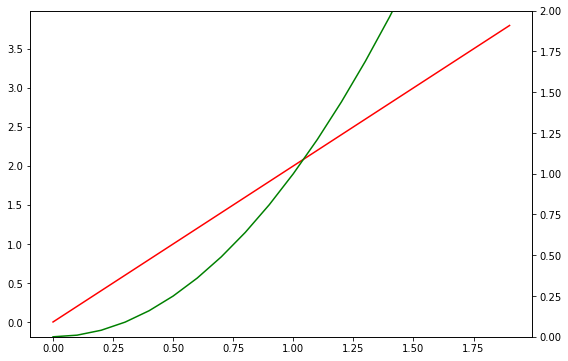

In [3]:
x = np.arange(0,2,0.1)
y1 = 2*x
y2 = x**2
fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()
ax2.set_ylim(0, 2)
ax1.plot(x,y1,c = "r")
ax2.plot(x,y2,c = "g")



test - mse: 0.992, standard stability: 0.001

test - mse: 0.994, standard stability: 0.002

test - mse: 1.007, standard stability: 0.005

test - mse: 1.025, standard stability: 0.016

test - mse: 1.064, standard stability: 0.033



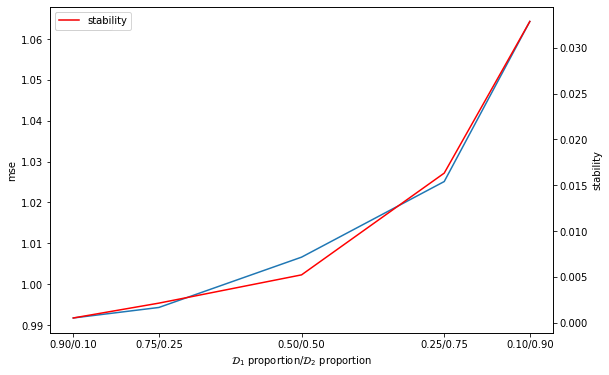

In [29]:
np.random.seed(0)
N = np.arange(250,10001,250)
fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()


N = [0.1, 0.25,0.5,0.75,0.9]
mse = {n:[] for n in N}
standard_stability = {n:[] for n in N}
X = np.random.uniform(0,4,size=(2000,1))
y = np.random.normal(X.ravel(), size=2000)
kf = RepeatedKFold(n_splits=5,n_repeats=10,random_state=0)
for n in N: #
    for train_index, test_index in kf.split(X):
        X_12, y_12 = X[train_index],y[train_index]
        X_test,y_test = X[test_index],y[test_index]
        X1,X2,y1,y2 =  train_test_split(X_12, y_12, test_size=n, random_state=0)
        criterion = "mse"
        model = NaiveUpdate(criterion = criterion,min_samples_leaf=5, adaptive_complexity=True)
                
        
        model.fit(X1,y1)
        pred1 = model.predict(X_test)
        
        model.update(X_12,y_12)
        

        pred2 = model.predict(X_test)

        mse[n].append(mean_squared_error(y_test,pred2))

        standard_stability[n].append(S2(pred1,pred2))
        

    
    
    print("="*80)
    
 
    print(f"test - mse: {np.mean(mse[n]):.3f}, standard stability: {np.mean(standard_stability[n]):.3f}")
    print("="*80)
    print()


ax1.plot(N,[np.mean(v) for v in mse.values()], label = "mse")
ax2.plot(N, [ np.mean(v) for v in standard_stability.values()], c = "r", label = "stability")

ax1.set_xlabel("$\mathcal{D}_1$ proportion/$\mathcal{D}_2$ proportion")
ax1.set_xticks(N, [f"{1-n:.2f}/{n:.2f}"for n in N])
ax1.set_ylabel("mse")
ax2.set_ylabel("stability")
ax1.legend()
ax2.legend()
plt.show()


test - mse: 0.991, standard stability: 0.018

test - mse: 0.991, standard stability: 0.031

test - mse: 0.991, standard stability: 0.054

test - mse: 0.991, standard stability: 0.091

test - mse: 0.991, standard stability: 0.149



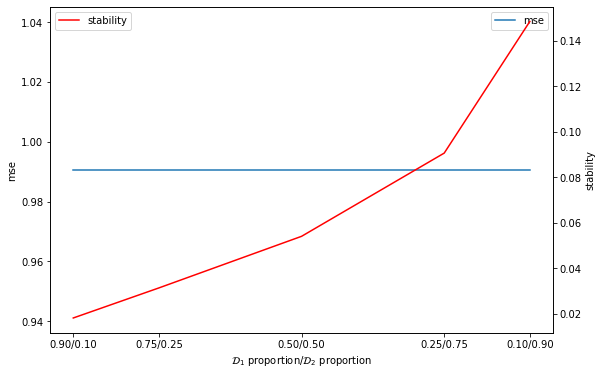

In [28]:
np.random.seed(0)
N = np.arange(250,10001,250)
fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()


N = [0.1, 0.25,0.5,0.75,0.9]
mse = {n:[] for n in N}
standard_stability = {n:[] for n in N}
X = np.random.uniform(0,4,size=(2000,1))
y = np.random.normal(X.ravel(), size=2000)
kf = RepeatedKFold(n_splits=5,n_repeats=10,random_state=0)
for n in N: #
    
    for train_index, test_index in kf.split(X):
        X_12, y_12 = X[train_index],y[train_index]
        X_test,y_test = X[test_index],y[test_index]
        X1,X2,y1,y2 =  train_test_split(X_12, y_12, test_size=n, random_state=0)
        criterion = "mse"
        model = BaseLineTree(criterion = criterion,min_samples_leaf=5, adaptive_complexity=True)
                
        
        model.fit(X1,y1)
        pred1 = model.predict(X_test)
        
        model.update(X_12,y_12)
        

        pred2 = model.predict(X_test)

        mse[n].append(mean_squared_error(y_test,pred2))

        standard_stability[n].append(S2(pred1,pred2))
        

    
    
    print("="*80)
    
 
    print(f"test - mse: {np.mean(mse[n]):.3f}, standard stability: {np.mean(standard_stability[n]):.3f}")
    print("="*80)
    print()


ax1.plot(N,[np.mean(v) for v in mse.values()], label = "mse")
ax2.plot(N, [ np.mean(v) for v in standard_stability.values()], c = "r", label = "stability")

ax1.set_xlabel("$\mathcal{D}_1$ proportion/$\mathcal{D}_2$ proportion")
ax1.set_xticks(N, [f"{1-n:.2f}/{n:.2f}"for n in N])
ax1.set_ylabel("mse")
ax2.set_ylabel("stability")
ax1.legend()
ax2.legend()
plt.show()


test - mse: 1.218, standard stability: 0.121

test - mse: 1.218, standard stability: 0.198

test - mse: 1.218, standard stability: 0.297

test - mse: 1.218, standard stability: 0.407

test - mse: 1.218, standard stability: 0.456



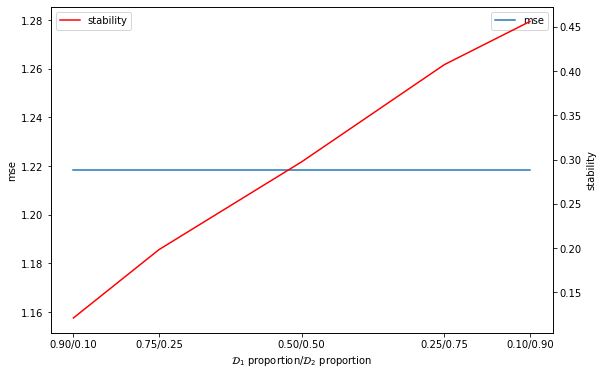

In [27]:
np.random.seed(0)
N = np.arange(250,10001,250)
fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()


N = [0.1, 0.25,0.5,0.75,0.9]
mse = {n:[] for n in N}
standard_stability = {n:[] for n in N}
X = np.random.uniform(0,4,size=(2000,1))
y = np.random.normal(X.ravel(), size=2000)
kf = RepeatedKFold(n_splits=5,n_repeats=10,random_state=0)
for n in N: #
    
    for train_index, test_index in kf.split(X):
        X_12, y_12 = X[train_index],y[train_index]
        X_test,y_test = X[test_index],y[test_index]
        X1,X2,y1,y2 =  train_test_split(X_12, y_12, test_size=n, random_state=0)
        criterion = "mse"
        model = DecisionTreeRegressor(criterion = criterion,min_samples_leaf=5, max_depth=10, random_state=0)
                
        
        model.fit(X1,y1)
        pred1 = model.predict(X_test)
        
        model.fit(X_12,y_12)
        

        pred2 = model.predict(X_test)

        mse[n].append(mean_squared_error(y_test,pred2))

        standard_stability[n].append(S2(pred1,pred2))
        

    
    
    print("="*80)
    
 
    print(f"test - mse: {np.mean(mse[n]):.3f}, standard stability: {np.mean(standard_stability[n]):.3f}")
    print("="*80)
    print()


ax1.plot(N,[np.mean(v) for v in mse.values()], label = "mse")
ax2.plot(N, [ np.mean(v) for v in standard_stability.values()], c = "r", label = "stability")

ax1.set_xlabel("$\mathcal{D}_1$ proportion/$\mathcal{D}_2$ proportion")
ax1.set_xticks(N, [f"{1-n:.2f}/{n:.2f}"for n in N])
ax1.set_ylabel("mse")
ax2.set_ylabel("stability")
ax1.legend()
ax2.legend()
plt.show()


test - mse: 0.991, standard stability: 0.007

test - mse: 0.991, standard stability: 0.020

test - mse: 0.989, standard stability: 0.043

test - mse: 0.989, standard stability: 0.082

test - mse: 0.991, standard stability: 0.143



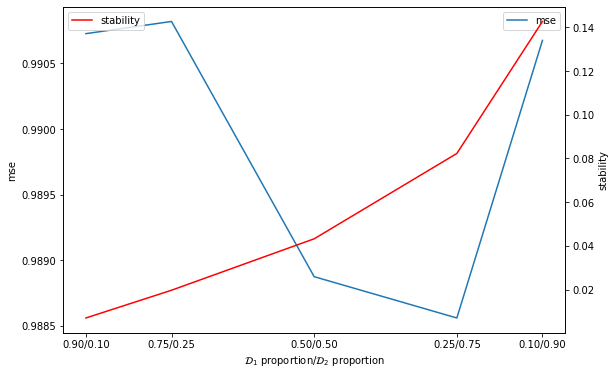

In [31]:
np.random.seed(0)
N = np.arange(250,10001,250)
fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()


N = [0.1, 0.25,0.5,0.75,0.9]
mse = {n:[] for n in N}
standard_stability = {n:[] for n in N}
X = np.random.uniform(0,4,size=(2000,1))
y = np.random.normal(X.ravel(), size=2000)
kf = RepeatedKFold(n_splits=5,n_repeats=10,random_state=0)
for n in N: #
    for train_index, test_index in kf.split(X):
        X_12, y_12 = X[train_index],y[train_index]
        X_test,y_test = X[test_index],y[test_index]
        X1,X2,y1,y2 =  train_test_split(X_12, y_12, test_size=n, random_state=0)
        criterion = "mse"
        model = AbuTreeI(criterion = criterion,min_samples_leaf=5, adaptive_complexity=True)
                
        
        model.fit(X1,y1)
        pred1 = model.predict(X_test)
        
        model.update(X_12,y_12)
        

        pred2 = model.predict(X_test)

        mse[n].append(mean_squared_error(y_test,pred2))

        standard_stability[n].append(S2(pred1,pred2))
        

    
    
    print("="*80)
    
 
    print(f"test - mse: {np.mean(mse[n]):.3f}, standard stability: {np.mean(standard_stability[n]):.3f}")
    print("="*80)
    print()


ax1.plot(N,[np.mean(v) for v in mse.values()], label = "mse")
ax2.plot(N, [ np.mean(v) for v in standard_stability.values()], c = "r", label = "stability")

ax1.set_xlabel("$\mathcal{D}_1$ proportion/$\mathcal{D}_2$ proportion")
ax1.set_xticks(N, [f"{1-n:.2f}/{n:.2f}"for n in N])
ax1.set_ylabel("mse")
ax2.set_ylabel("stability")
ax1.legend()
ax2.legend()
plt.show()


test - mse: 0.991, standard stability: 0.001

test - mse: 0.993, standard stability: 0.004

test - mse: 0.992, standard stability: 0.016

test - mse: 0.990, standard stability: 0.050

test - mse: 0.990, standard stability: 0.122



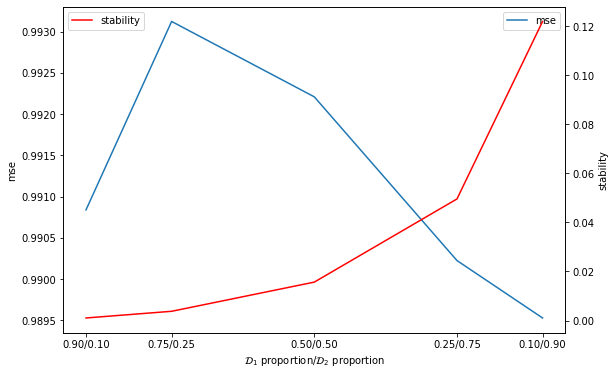

In [33]:
np.random.seed(0)
N = np.arange(250,10001,250)
fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()


N = [0.1, 0.25,0.5,0.75,0.9]
mse = {n:[] for n in N}
standard_stability = {n:[] for n in N}
X = np.random.uniform(0,4,size=(2000,1))
y = np.random.normal(X.ravel(), size=2000)
kf = RepeatedKFold(n_splits=5,n_repeats=10,random_state=0)
for n in N: #
    for train_index, test_index in kf.split(X):
        X_12, y_12 = X[train_index],y[train_index]
        X_test,y_test = X[test_index],y[test_index]
        X1,X2,y1,y2 =  train_test_split(X_12, y_12, test_size=n, random_state=0)
        criterion = "mse"
        model = BABUTree(criterion = criterion,min_samples_leaf=5, adaptive_complexity=True)
                
        
        model.fit(X1,y1)
        pred1 = model.predict(X_test)
        
        model.update(X_12,y_12)
        

        pred2 = model.predict(X_test)

        mse[n].append(mean_squared_error(y_test,pred2))

        standard_stability[n].append(S2(pred1,pred2))
        

    
    
    print("="*80)
    
 
    print(f"test - mse: {np.mean(mse[n]):.3f}, standard stability: {np.mean(standard_stability[n]):.3f}")
    print("="*80)
    print()


ax1.plot(N,[np.mean(v) for v in mse.values()], label = "mse")
ax2.plot(N, [ np.mean(v) for v in standard_stability.values()], c = "r", label = "stability")

ax1.set_xlabel("$\mathcal{D}_1$ proportion/$\mathcal{D}_2$ proportion")
ax1.set_xticks(N, [f"{1-n:.2f}/{n:.2f}"for n in N])
ax1.set_ylabel("mse")
ax2.set_ylabel("stability")
ax1.legend()
ax2.legend()
plt.show()
